<a href="https://colab.research.google.com/github/ash95sv/AMLS_II_assignment19_20-/blob/master/TaskB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
if 'google.colab' in sys.modules: # Colab-only Tensorflow version selector
  %tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.2.0-rc3


In [0]:
# Detect hardware, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
    tpu = None
    gpus = tf.config.experimental.list_logical_devices("GPU")

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
elif len(gpus) > 1: # multiple GPUs in one VM
    strategy = tf.distribute.MirroredStrategy(gpus)
else: # default strategy that works on CPU and single GPU
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  ['10.97.117.42:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.97.117.42:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.97.117.42:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


In [0]:
# batch and learning rate settings
if strategy.num_replicas_in_sync == 8: # TPU or 8xGPU
    BATCH_SIZE = 2 * strategy.num_replicas_in_sync
elif strategy.num_replicas_in_sync == 1: # single GPU
    BATCH_SIZE = 16
else: # TPU pod
    BATCH_SIZE = 8 * strategy.num_replicas_in_sync

In [0]:
import nltk
nltk.download() 

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt
      Package punkt is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

import spacy 
#import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, MaxPooling1D, Conv1D, GlobalMaxPool1D
from tensorflow.keras.layers import LSTM, Lambda, Bidirectional, concatenate, BatchNormalization
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback

import re
import tensorflow.keras.callbacks
import os
from nltk.tokenize import sent_tokenize, word_tokenize
from string import punctuation 
#import nltk
#nltk.download('stopwords') 
from nltk.corpus import stopwords


def binarize(x, sz=72):
    return tf.cast(tf.one_hot(x, sz, on_value=1, off_value=0, axis=-1),dtype=tf.float32)

def binarize_outshape(in_shape, sz=72):
    return in_shape[0], in_shape[1], sz


def striphtml(s):
    p = re.compile(r'<.*?>')
    return p.sub('', s)


def clean(s):
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', s) # remove URLs
    tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet) # remove the # in #hashtag
    #tweet = word_tokenize(tweet) # remove repeated characters (helloooooooo into hello)
    return tweet


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#read the training data files
df_train_2015 = pd.read_excel('twitter-2015train-BD.xls', names=('id', 'topic', 'label','tweet'), header=None)
df_test_2015 = pd.read_excel('twitter-2015testBD.xls', names=('id', 'topic', 'label','tweet'),header=None)
df_train_2016=pd.read_excel('twitter-2016train-BD.xls', names=('id', 'topic', 'label','tweet'),header=None)
df_dev = pd.read_excel('twitter-2016dev-BD.xls', names=('id', 'topic', 'label','tweet'),header=None)
df_devtest = pd.read_excel('twitter-2016devtest-BD.xls', names=('id', 'topic', 'label','tweet'),header=None)
df_test_2016 = pd.read_excel('twitter-2016test-BD.xls', names=('id', 'topic', 'label','tweet'),header=None)
#read the test data file
df_test=pd.read_excel('SemEval2017-task4-test.subtask-BD.english.xls', names=('id', 'topic', 'label','tweet'),header=None)
print(len(df_train_2015),len(df_test_2015),len(df_devtest),len(df_dev),len(df_train_2016),len(df_test_2016),len(df_test))


489 2383 1417 1325 4346 10552 6185


In [0]:
df = pd.concat([df_train_2015,df_test_2015,df_train_2016,df_test_2016,df_dev,df_devtest])
labels = df['label'].reset_index(drop=True) # label dataframe
len(df)

20512

In [0]:
# remove neutral label, nan and off topics from df
df = df[df.label != 'neutral']
df = df[df.label != 'off topic']
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
len(df)

18964

In [0]:
#describe the distribution of labels 
df.groupby('label').describe()

id         ...                                              tweet     
          count unique  ...                                                top freq
label                   ...                                                        
negative   4013   4000  ...  Okay so the White Sox suck, Rose and Kane may ...    2
positive  14951  14901  ...  Go all Wednesday Adams on us with our gorgeous...    4

[2 rows x 12 columns]

In [0]:
#describe the description of topics
df_topic = df.groupby('topic')
df_topic.describe()

id  ... tweet
               count  ...  freq
topic                 ...      
#dexter           12  ...     1
@microsoft        80  ...     1
a$ap rocky         7  ...     1
aaron rodgers     16  ...     1
aaron samuels      6  ...     1
...              ...  ...   ...
yougov             8  ...     1
younique          10  ...     1
zac brown band   113  ...     1
zayn             117  ...     1
zlatan            64  ...     1

[358 rows x 12 columns]

In [0]:
df.replace({'label': {'positive': 1, 'negative': 0}},inplace=True)

In [0]:
pd.unique(df.label)

array([1, 0])

In [0]:
df_test.replace({'label': {'positive': 1, 'negative': 0}},inplace=True)
df_test.groupby('label').describe()

id                ...                            
        count          mean  ...           75%           max
label                        ...                            
0      3722.0  8.029570e+17  ...  8.052354e+17  8.057249e+17
1      2463.0  8.026407e+17  ...  8.023762e+17  8.057242e+17

[2 rows x 8 columns]

In [0]:
df_test['label'].value_counts()[1]

2463

In [0]:
#Average Recall, F1 score and Accuracy for All Positive and All Negative baselines
#data = {'True' : df_test['label']}
df_base = pd.DataFrame(y_test, columns=['True'])
df_base['all positive'] = 1.0
df_base['all negative'] = 0.0
df_base=df_base.reset_index(drop=True)
df_base
p_recall_1 = recall_score(df_base['True'], df_base['all positive'])
n_recall_1 = 0.0
p_recall_2 = recall_score(df_base['True'], df_base['all negative'])
n_recall_2 = 1.0

In [0]:
print(p_recall_1, n_recall_1, p_recall_2 , n_recall_2)

1.0 0.0 0.0 1.0


In [0]:
avg_recall_p = (p_recall_1 + n_recall_1)/2
avg_recall_n = (p_recall_2+n_recall_2)/2
print("Average Recall B1: ", avg_recall_p)
print("Average Recall B2: ", avg_recall_n)

Average Recall B1:  0.5
Average Recall B2:  0.5


In [0]:
C1 = confusion_matrix(df_base['True'],df_base['all positive'])
C2 = confusion_matrix(df_base['True'],df_base['all negative'])
print(C1)
print(C2)
p_prec_1 = C1[1][1]/(C1[1][1]+C1[0][1])
n_prec_1 = 0
p_prec_2 = 0
n_prec_2 = C2[0][0]/(C2[1][0]+C2[0][0])
prec_1 = (p_prec_1 + n_prec_1)/2
prec_2 = (p_prec_2 + n_prec_2)/2
print("Average Precision B1: ", prec_1)
print("Average Precision B2: ", prec_2)

[[   0  786]
 [   0 3007]]
[[ 786    0]
 [3007    0]]
Average Precision B1:  0.39638808331136305
Average Precision B2:  0.10361191668863697


In [0]:
def F1_score(r,p):
  return 2*r*p/(r+p)

F1_1 = F1_score(avg_recall_p,prec_1)
F1_2 = F1_score(avg_recall_n,prec_2)
print("F1 scores:", F1_1,F1_2)

F1 scores: 0.44220588235294117 0.17165319938851276


In [0]:
Acc_1=accuracy_score(df_base['True'],df_base['all positive'])
Acc_2=accuracy_score(df_base['True'],df_base['all negative'])
print("Accuracies: ", Acc_1, Acc_2)

Accuracies:  0.7927761666227261 0.20722383337727393


In [0]:
y = df['label'].tolist()
type(y)
y[99]

0

In [0]:
# CNN with entire tweet and topic #Character
def pre_process(df):
  df['combined']=df['tweet']+' '+df['topic']
  txt = ''
  docs = []
  sentences = []
  sentiments = []
  tweets=[]
  i=0
  stop_words = set(stopwords.words('english') + list(punctuation) + ['at_user','url'])

  '''for cont, sentiment in zip(df_train.combined, df_train.label):
      #sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', clean(striphtml(cont)))
      cont.lower()
      tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', cont) # remove URLs
      tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
      tweet = re.sub(r'#([^\s]+)', r'\1', tweet) # remove the # in #hashtag
      tweet = word_tokenize(tweet)
      docs.append(tweet)
      sentiments.append(sentiment)'''
  for cont, sentiment in zip(df.combined, df.label):
      strip=striphtml(cont)
      cleaned=clean(strip)
      sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', cleaned)
      sentences = [sent.lower() for sent in sentences]
      sentences = [word_tokenize(sent) for sent in sentences]
      sentence_fin =[]
      for sent in sentences:
          sentence_fin.append([word for word in sent if word not in stop_words])
      docs.append(sentence_fin)
      sentiments.append(sentiment)

  print(docs[80:90])
  #find max number of sentences.
  i=0
  max_i=0
  for sent in docs:
      i=0
      for k in sent:
          i=i+1
      max_i=max(i,max_i)
      if(i==max_i):
          j_max=sent

  #find max number of characters in a tweet
  max_char=0
  for doc in docs:
      count=0
      for sent in doc:
          for word in sent:
              for s in word:
                  count+=1
                  max_char=max(max_char,count)
  print(max_char)
  for doc in docs:
      for sent in doc:
          for word in sent:
              for s in word:
                  txt += s
          
  chars = set(txt)
  print('total chars:', len(chars))
  char_indices = dict((c, i) for i, c in enumerate(chars))
  indices_char = dict((i, c) for i, c in enumerate(chars))

  maxlen = 140 
  max_sentences = 10

  X = np.ones((len(docs), max_sentences, maxlen), dtype=np.int64) * -1
  y = np.array(sentiments)
  max_j=0
  for i, doc in enumerate(docs):
      for j, sentence in enumerate(doc):
          if j < max_sentences:
              for word in sentence[-maxlen:]:
                  for t, char in enumerate(word):
                      X[i, j, (maxlen-1-t)] = char_indices[char]
            
  #ONE HOT ENCODING LABELS
  #label_encoder = LabelEncoder()
  #integer_category = label_encoder.fit_transform(df.label)
  #y = sentiments
  #shuffle X and y
  ids = np.arange(len(X))
  np.random.shuffle(ids)

  # shuffle
  X = X[ids]
  y = y[ids]

  print("Shape of X ", X.shape)
  print("Shape of Y ", y.shape)
  return X,y,chars, max_sentences, maxlen

In [0]:
X, y,chars, max_sentences, maxlen = pre_process(df)
y[0:10]

[[['beohner', "''", 'got', '98', 'wanted.\\', "''", 'fact', 'dow', '634', 'today', 'boehner', 'owns', 'every', 'point'], ['p2', 'fok', 'maddow', 'teaparty', 'boehner']], [['mt', 'boehner', 'asks', 'obama', 'move', 'speech', 'thurs', '||', 'forget', 'u', "''", 'w/o', 'u\\', "''"], ['tues', 'works'], ['boehner']], [['hide', 'country', 'clubs', 'u', 'want', 'boehner', 'reverserobocall.com', 'launching', 'soon', "'m", 'one', '1st', 'line', 'join'], ['launch', 'boehner']], [['yeah', 'bright', 'side', 'got', 'letter', 'boise', 'state', 'yesterday', 'boise', 'state']], [['boise', 'state', "'s", 'jerseys', 'game', 'saturday', 'sick'], ['wo', "n't", 'dissapointed'], ['boise', 'state']], [['got', '2', 'letters', 'today', 'one', 'wake', 'forest', 'university', 'boise', 'state', 'boise', 'state']], [['ideal', 'world', 'oregon', 'boise', 'state', 'win', 'sept', '3rd', 'give', 'power', 'pac', 'nw', 'goducks', 'boise', 'state']], [['night', 'dream', 'uga', 'beat', 'boise', 'state'], ['let', "'s", 'ho

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [0]:
def create_model(chars,max_sentences,maxlen):
  filter_length = [5, 3, 3]
  nb_filter = [8, 16, 16]
  pool_length = 2
  # document input
  document = Input(shape=(max_sentences, maxlen), dtype='int64')
  # sentence input
  in_sentence = Input(shape=(maxlen,), dtype='int64')
  # char indices to one hot matrix, 1D sequence to 2D 
  embedded = Lambda(binarize, output_shape=binarize_outshape)(in_sentence)
  # embedded: encodes sentence
  for i in range(len(nb_filter)):
      embedded = Conv1D(filters=nb_filter[i],
                        kernel_size=filter_length[i],
                        padding='same',
                        activation='relu',
                        kernel_initializer='he_normal',
                        strides=1)(embedded)

      embedded = MaxPooling1D(pool_size=pool_length)(embedded)
      embedded = Dropout(0.3)(embedded)


  bi_lstm_sent = Bidirectional(LSTM(20, return_sequences=False, dropout=0.3, recurrent_dropout=0.3, implementation=0))(embedded)

  # sent_encode = merge([forward_sent, backward_sent], mode='concat', concat_axis=-1)
  sent_encode = Dropout(0.3)(bi_lstm_sent)
  # sentence encoder
  encoder = Model(inputs=in_sentence, outputs=sent_encode)
  encoder.summary()

  encoded = TimeDistributed(encoder)(document)
  # encoded: sentences to bi-lstm for document encoding 
  b_lstm_doc = Bidirectional(LSTM(20, return_sequences=False, dropout=0.3, recurrent_dropout=0.3, implementation=0))(encoded)

  output = Dropout(0.3)(b_lstm_doc)
  output = Dense(20, activation='relu')(output)
  output = Dropout(0.3)(output)
  output = Dense(1, activation='sigmoid')(output)

  model = Model(inputs=document, outputs=output)

  model.summary()
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [0]:
epochs=50
optimizer = 'adam'

with strategy.scope():
  model = create_model(chars,max_sentences,maxlen)

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 140)]             0         
_________________________________________________________________
lambda_3 (Lambda)            (None, 140, 72)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 140, 8)            2888      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 70, 8)             0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 70, 8)             0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 70, 16)            400       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 35, 16)            0   

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 10, 140)]         0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 10, 40)            9992      
_________________________________________________________________
bidirectional_7 (Bidirection (None, 40)                9760      
_________________________________________________________________
dropout_22 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                820       
_________________________________________________________________
dropout_23 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21  

In [0]:
checkpoint = ModelCheckpoint("model_semeval.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early = EarlyStopping(monitor='val_loss', mode='min', patience=5)
callback = [checkpoint,early]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train,X_val,y_train,y_val = train_test_split(X_train , y_train , test_size=0.25, random_state = 42)
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = epochs, batch_size=BATCH_SIZE, validation_data=(X_val, y_val),verbose = 1, callbacks = callback)

Epoch 1/50
712/712 [==============================] - ETA: 0s - loss: 0.5329 - accuracy: 0.7885
Epoch 00001: val_loss improved from inf to 0.52194, saving model to model_semeval.h5
712/712 [==============================] - 18s 25ms/step - loss: 0.5329 - accuracy: 0.7885 - val_loss: 0.5219 - val_accuracy: 0.7825
Epoch 2/50
712/712 [==============================] - ETA: 0s - loss: 0.5236 - accuracy: 0.7889
Epoch 00002: val_loss improved from 0.52194 to 0.52187, saving model to model_semeval.h5
712/712 [==============================] - 18s 25ms/step - loss: 0.5236 - accuracy: 0.7889 - val_loss: 0.5219 - val_accuracy: 0.7825
Epoch 3/50
712/712 [==============================] - ETA: 0s - loss: 0.5094 - accuracy: 0.7891
Epoch 00003: val_loss improved from 0.52187 to 0.48830, saving model to model_semeval.h5
712/712 [==============================] - 18s 25ms/step - loss: 0.5094 - accuracy: 0.7891 - val_loss: 0.4883 - val_accuracy: 0.7825
Epoch 4/50
712/712 [==============================

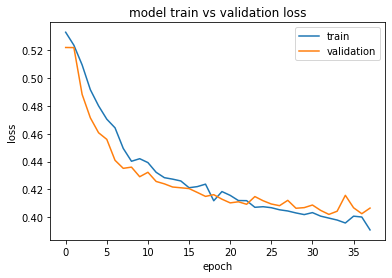

In [0]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [0]:
#X_test,y_test,a,b,c=pre_process(df_test)

129
total chars: 51
Shape of X  (6185, 10, 140)
Shape of Y  (6185,)


In [0]:
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [0]:
predictions = model.predict(X_test, batch_size = BATCH_SIZE, verbose = 1)

238/238 [==============================] - 2s 7ms/step


In [0]:
predictions.shape

(3800, 1)

In [0]:
pred=(predictions[0:3793] > 0.5).astype(np.uint8)
accuracy_score(y_test,pred)

0.8426047983126812